In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

In [2]:
df = pd.read_csv("creditcard.csv")  # Replace with your dataset path


In [3]:
print(df.head())
print(df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

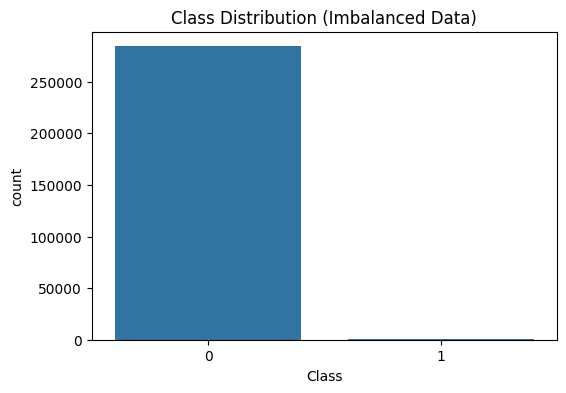

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (Imbalanced Data)")
plt.show()

In [5]:
X = df.drop(columns=["Class"])
y = df["Class"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)


In [11]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56841
           1       1.00      0.99      0.99      5709

    accuracy                           1.00     62550
   macro avg       1.00      0.99      1.00     62550
weighted avg       1.00      1.00      1.00     62550

Confusion Matrix:
 [[56830    11]
 [   67  5642]]


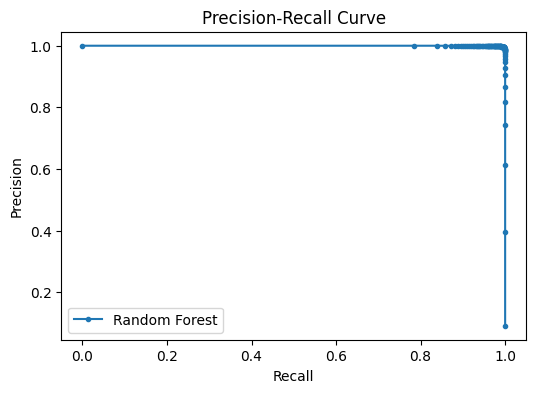

In [12]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker=".", label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [13]:
import joblib

# Save the model
joblib.dump(model, "credit_card_fraud_model.pkl")

# Load the model when needed
loaded_model = joblib.load("credit_card_fraud_model.pkl")

# Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)


: 